In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving fox.csv to fox.csv


In [ ]:
df = pd.read_csv('fox.csv')

In [ ]:
df[['text','label']].head()

,text,label
0,Ukrainian President Volodymyr Zelenskyy is exp...,pos
1,Biden admin worries about potential escalation...,pos
2,Hageman spotlights Cheney's roots in Northern ...,pos
3,Lorie Smith says Colorado is violating her Fir...,pos
4,Delaware resident says law that takes effect t...,pos


In [ ]:
sentiment_label = df.label.factorize()
sentiment_label # pos is 0, neg is 1

(array([0, 0, 0, ..., 0, 0, 0]), Index(['pos', 'neg'], dtype='object'))

In [ ]:
news = df.text.values

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(news)

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(news) # Replace the words with their assigned numbers using the text_to_sequence()

In [ ]:
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
padded_sequence # Use padding to pad the sentences to have equal length.

array([[ 276,  450,   22, ...,   22,  109,   53],
       [  12,    1,  404, ...,   22,  109,   53],
       [  13,  248,  181, ...,   10, 1144, 1709],
       ...,
       [   1,  122,   76, ..., 2037,   82,  996],
       [  12,    6, 3414, ...,   43,  544,  345],
       [  38,  501,    6, ...,  521,   11,   53]], dtype=int32)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

44638

In [ ]:
# Build the text classifier
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 32)           1428416   
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,445,067
Trainable params: 1,445,067
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32) # Train the model

Epoch 1/5
89/89 [==============================] - 24s 236ms/step - loss: 0.5306 - accuracy: 0.8045 - val_loss: 0.4266 - val_accuracy: 0.8515
Epoch 2/5
89/89 [==============================] - 21s 235ms/step - loss: 0.4782 - accuracy: 0.8126 - val_loss: 0.4157 - val_accuracy: 0.8515
Epoch 3/5
89/89 [==============================] - 21s 232ms/step - loss: 0.4167 - accuracy: 0.8257 - val_loss: 0.4467 - val_accuracy: 0.8331
Epoch 4/5
89/89 [==============================] - 22s 243ms/step - loss: 0.3302 - accuracy: 0.8688 - val_loss: 0.4799 - val_accuracy: 0.8218
Epoch 5/5
89/89 [==============================] - 22s 253ms/step - loss: 0.2544 - accuracy: 0.9028 - val_loss: 0.5074 - val_accuracy: 0.8487


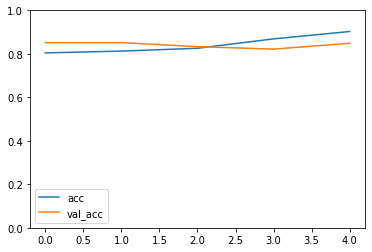

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.ylim(0,1)
plt.show()

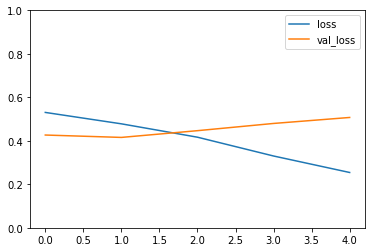

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.ylim(0,1)
plt.show()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data_text = df[['text']]
data_text['index'] = data_text.index
documents = data_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
documents

,text,index
0,Ukrainian President Volodymyr Zelenskyy is exp...,0
1,Biden admin worries about potential escalation...,1
2,Hageman spotlights Cheney's roots in Northern ...,2
3,Lorie Smith says Colorado is violating her Fir...,3
4,Delaware resident says law that takes effect t...,4
...,...,...
3530,The rule is part of a growing trend to curb at...,3530
3531,San Francisco is 'doomed' with Chesa Boudin as...,3531
3532,"RaeAnn Ensworth said of police, 'I have always...",3532
3533,House GOP leader Kevin McCarthy in August pred...,3533


In [ ]:
doc_sample = documents[documents['index'] == 3534].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Progressives', 'failed', 'on', 'their', 'biggest', 'policy', 'goals', 'but', 'showed', 'their', 'leverage', 'and', 'controlled', 'debate', 'among', 'Democrats"Squad"', 'Democrats', 'failed', 'on', 'their', 'biggest', 'policy', 'priority', 'of', '2021', 'when', 'moderate', 'Sen.', 'Joe', 'Manchin', 'announced', 'he', "won't", 'support', 'his', "party's", 'massive', 'reconciliation', 'spending', 'bill', '–', 'but', 'progressives', 'still', 'showed', 'their', 'power', 'this', 'year', 'as', 'they', 'controlled', "Democrats'", 'agenda', 'and', 'dominated', 'the', 'political', 'conversation."They', 'lost', 'on', 'the', 'infrastructure-reconciliation', 'battle.', 'But', 'you', "shouldn't", 'think', 'about', 'this', 'in', 'terms', 'of', 'outcomes,"', 'R', 'Street', 'Institute', 'senior', 'fellow', 'for', 'governance', 'James', 'Wallner', 'told', 'Fox', 'News.', '"They', 'were', 'able', 'to', 'basically', 'take', 'a', 'bad', 'situation', 'for', 'them…', 'and', 'they', 'wer

In [ ]:
processed_docs = documents['text'].map(preprocess)
processed_docs[:10]

0    [ukrainian, president, volodymyr, zelenskyy, e...
1    [biden, admin, worry, potential, escalation, r...
2    [hageman, spotlight, cheney, root, northern, v...
3    [lorie, smith, say, colorado, violate, amendme...
4    [delaware, resident, say, take, effect, year, ...
5    [glaad, praise, transgender, segmentsdr, mehme...
6    [bereave, widow, say, husband, tell, seat, jen...
7    [largest, risk, escalation, conflict, zone, en...
8    [pay, close, attention, start, putin, pelosi, ...
9    [reminder, vaccinate, haven, case, obama, said...
Name: text, dtype: object

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 action
1 additional
2 address
3 admiration
4 aggression
5 alliance
6 ally
7 amid
8 announce
9 artery
10 article


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[3534]

[(7, 1),
 (16, 1),
 (26, 1),
 (41, 2),
 (54, 1),
 (62, 1),
 (69, 2),
 (70, 3),
 (76, 1),
 (89, 1),
 (91, 1),
 (92, 2),
 (97, 1),
 (99, 8),
 (146, 4),
 (151, 1),
 (152, 1),
 (161, 1),
 (163, 1),
 (170, 1),
 (183, 1),
 (186, 1),
 (189, 4),
 (196, 1),
 (198, 1),
 (212, 2),
 (219, 1),
 (223, 1),
 (234, 1),
 (238, 1),
 (245, 1),
 (253, 1),
 (256, 1),
 (261, 2),
 (277, 1),
 (292, 1),
 (294, 1),
 (295, 5),
 (305, 2),
 (318, 1),
 (334, 1),
 (341, 6),
 (348, 1),
 (370, 1),
 (377, 5),
 (381, 2),
 (385, 1),
 (392, 1),
 (402, 5),
 (431, 1),
 (436, 3),
 (438, 2),
 (446, 1),
 (451, 1),
 (458, 1),
 (474, 1),
 (475, 1),
 (476, 1),
 (489, 1),
 (496, 1),
 (538, 1),
 (543, 1),
 (550, 1),
 (553, 1),
 (555, 1),
 (567, 1),
 (570, 1),
 (584, 1),
 (596, 1),
 (600, 1),
 (620, 1),
 (625, 1),
 (626, 1),
 (634, 1),
 (656, 1),
 (681, 1),
 (682, 1),
 (684, 1),
 (728, 1),
 (730, 2),
 (736, 2),
 (746, 5),
 (751, 1),
 (752, 2),
 (766, 1),
 (780, 1),
 (782, 1),
 (790, 3),
 (793, 1),
 (797, 1),
 (808, 1),
 (840, 1),
 (8

In [ ]:
bow_doc_4310 = bow_corpus[3534]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 7 ("announce") appears 1 time.
Word 16 ("calif") appears 1 time.
Word 26 ("continue") appears 1 time.
Word 41 ("expand") appears 2 time.
Word 54 ("legislation") appears 1 time.
Word 62 ("members") appears 1 time.
Word 69 ("pass") appears 2 time.
Word 70 ("pelosi") appears 3 time.
Word 76 ("provision") appears 1 time.
Word 89 ("schumer") appears 1 time.
Word 91 ("senate") appears 1 time.
Word 92 ("show") appears 2 time.
Word 97 ("spend") appears 1 time.
Word 99 ("support") appears 8 time.
Word 146 ("caucus") appears 4 time.
Word 151 ("comment") appears 1 time.
Word 152 ("committee") appears 1 time.
Word 161 ("deputy") appears 1 time.
Word 163 ("die") appears 1 time.
Word 170 ("effective") appears 1 time.
Word 183 ("force") appears 1 time.
Word 186 ("gain") appears 1 time.
Word 189 ("go") appears 4 time.
Word 196 ("hear") appears 1 time.
Word 198 ("help") appears 1 time.
Word 212 ("issue") appears 2 time.
Word 219 ("lead") appears 1 time.
Word 223 ("maintain") appears 1 time.
Word 2

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.029048048021168206),
 (1, 0.10219967737059035),
 (2, 0.0661914533469502),
 (3, 0.058963983793663195),
 (4, 0.06587501897622976),
 (5, 0.039238102452641865),
 (6, 0.03520438668155338),
 (7, 0.02813652117960205),
 (8, 0.11139470202965399),
 (9, 0.05878483962008613),
 (10, 0.07175348485208115),
 (11, 0.06299769956475167),
 (12, 0.03200564489197003),
 (13, 0.12599539912950333),
 (14, 0.06225485140565173),
 (15, 0.0824749184203043),
 (16, 0.06184130320514127),
 (17, 0.019322766616090347),
 (18, 0.09055276379395442),
 (19, 0.08841004036951479),
 (20, 0.060165173968069786),
 (21, 0.05066295765773679),
 (22, 0.06662506316224508),
 (23, 0.050724843529014685),
 (24, 0.0951177891182724),
 (25, 0.22441224436809581),
 (26, 0.030934277776419165),
 (27, 0.0221148946071112),
 (28, 0.04744758382184648),
 (29, 0.040638349390673005),
 (30, 0.08875305785383068),
 (31, 0.09755146922534466),
 (32, 0.10210577806383615),
 (33, 0.10426411563550948),
 (34, 0.08875305785383068),
 (35, 0.053284266522755246

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2) # Train the lda model using gensim.models.LdaMulticore

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic)) # Explore the words occurring in that topic and its relative weight

Topic: 0 
Words: 0.009*"border" + 0.008*"administration" + 0.007*"school" + 0.006*"trump" + 0.006*"covid" + 0.005*"mask" + 0.004*"year" + 0.004*"texas" + 0.004*"mandate" + 0.004*"migrants"
Topic: 1 
Words: 0.022*"ukraine" + 0.018*"russia" + 0.012*"russian" + 0.009*"nato" + 0.008*"putin" + 0.005*"zelenskyy" + 0.005*"military" + 0.005*"unite" + 0.005*"ukrainian" + 0.005*"force"
Topic: 2 
Words: 0.021*"russia" + 0.017*"ukraine" + 0.011*"russian" + 0.009*"putin" + 0.008*"trump" + 0.005*"sanction" + 0.005*"administration" + 0.005*"invasion" + 0.004*"continue" + 0.004*"ukrainian"
Topic: 3 
Words: 0.015*"ukraine" + 0.009*"putin" + 0.009*"russia" + 0.007*"russian" + 0.006*"administration" + 0.005*"trump" + 0.004*"go" + 0.004*"court" + 0.004*"york" + 0.004*"support"
Topic: 4 
Words: 0.012*"court" + 0.008*"jackson" + 0.007*"senate" + 0.006*"republican" + 0.006*"supreme" + 0.005*"trump" + 0.005*"campaign" + 0.004*"judge" + 0.004*"china" + 0.004*"white"
Topic: 5 
Words: 0.006*"test" + 0.005*"borde

In [ ]:
# importing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Input text - to summarize
text = """(CNN)The Florida state Senate on Wednesday advanced legislation pushed by Republican Gov. Ron DeSantis during the state's special legislative session: a new congressional map submitted by the governor and a pair of bills aimed at Disney.

The DeSantis-backed map -- which proposes an aggressively partisan redrawing of the state's congressional boundaries that could help the Republican Party pick up four seats in the US House of Representatives this November -- passed the GOP-led Senate along party lines.
During the special session, state senators also passed a bill that would eliminate the unique status that allows Disney to operate as an independent government around its Orlando-area theme parks. One Republican, Sen. Jeff Brandes, voted with Democrats against the bill.
Additionally, the state Senate gave final passage along party lines to a bill that would eliminate a Disney carve-out in a social media bill that was signed into law last year but put on hold by a federal judge.
The Florida House still must pass the bills. It is expected to hold final debate and votes on Thursday.
The bills all have received blowback from Democrats in the state.
Democrats have criticized the map because it eliminates two seats held by Black members of Congress, while adding several likely Republican districts to the state.
The Republican-controlled legislature passed a different congressional district map during the regular session, but DeSantis vetoed that version. Florida Republicans then said they would allow the governor to decide how to reapportion the state's congressional districts. DeSantis offered his map last week, and it was the only version considered by the Senate during the special session.
While the special session was initially called to finalize the once-a-decade work of reapportioning congressional lines, state lawmakers added the Disney legislation to the docket after DeSantis on Tuesday escalated his weeks-long feud with Disney, challenging lawmakers in a surprise bombshell announcement to unravel the 55-year-old Reedy Creek Improvement Act, a unique Florida law that helped establish Walt Disney World in the state by giving the brains behind Mickey Mouse operational autonomy.
Within hours, Republican lawmakers delivered, advancing a pair of bills targeting Disney over its objections to a new law limiting classroom instruction on sexual orientation and gender identity.
"Once upon a time Disney was a great partner with the state of Florida," said Rep. Jackie Toledo, a Tampa Republican. "We've granted them privileges because of our shared history, shared goals and shared successes. Shamefully, Disney betrayed us."
It now appears almost certain that by the end of the week, the long-standing symbiotic arrangement that helped grow Disney into an iconic entertainment brand and Florida into an international travel destination could be dissolved.
GOP-controlled committees in the state House and Senate voted in favor of a bill that would end the special district on June 1, 2023.
Another bill, to subject Disney to a state law that allows people to sue Big Tech companies for censorship, also passed out of initial committees Tuesday afternoon. Disney had won an exemption from the bill last year. A federal judge has blocked the law but Florida is appealing the ruling.
Republicans in Florida and Disney have been at odds for months over legislation that prohibits schools from teaching young children about sexual orientation or gender identity. After initially declining to weigh in, Disney CEO Bob Chapek publicly criticized Florida lawmakers for passing what opponents called the "Don't Say Gay" bill and apologized to the company's LGBTQ employees for not being a stronger advocate.
Chapek announced that the company would stop making political donations in Florida after decades of contributing generously, mostly to Republicans, including a $50,000 donation to DeSantis' reelection effort."""

# Tokenizing the text
stopWords = set(stopwords.words("english"))
words = word_tokenize(text)

# Score of each word
freqTable = dict()
for word in words:
	word = word.lower()
	if word in stopWords:
		continue
	if word in freqTable:
		freqTable[word] += 1
	else:
		freqTable[word] = 1

# Calculate the score
sentences = sent_tokenize(text)
sentenceValue = dict()

for sentence in sentences:
	for word, freq in freqTable.items():
		if word in sentence.lower():
			if sentence in sentenceValue:
				sentenceValue[sentence] += freq
			else:
				sentenceValue[sentence] = freq

sumValues = 0
for sentence in sentenceValue:
	sumValues += sentenceValue[sentence]

# Average value of a sentence from the original text

average = int(sumValues / len(sentenceValue))

# Storing sentences into our summary.
summary = ''
for sentence in sentences:
	if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.9 * average)):
		summary += " " + sentence
print(summary)